In [1]:
import pandas as pd
import os

from optimizer import FW
from utils import process_dataset, plot_hisotry

# Armijo line search

In [35]:
stepsize_strategy='armijo'

## Instance 1: Johnson8-2-4

In [36]:
dataset = "johnson8-2-4"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [5]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()

for seed in range(50):
    print(seed)
    for variant in variants:
        fw = FW(variant=variant, 
                stepsize_strategy = 'armijo', 
                ssc_procedure=False)
        fw.optimize(complement_hyperedges, n, seed=seed)
        df_current = pd.DataFrame(fw.history)
        df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))

        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0
1
2
3
4
5
6
7
global step
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
global step
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
global step
41
42
global step
43
44
45
46
global step
47
48
global step
49


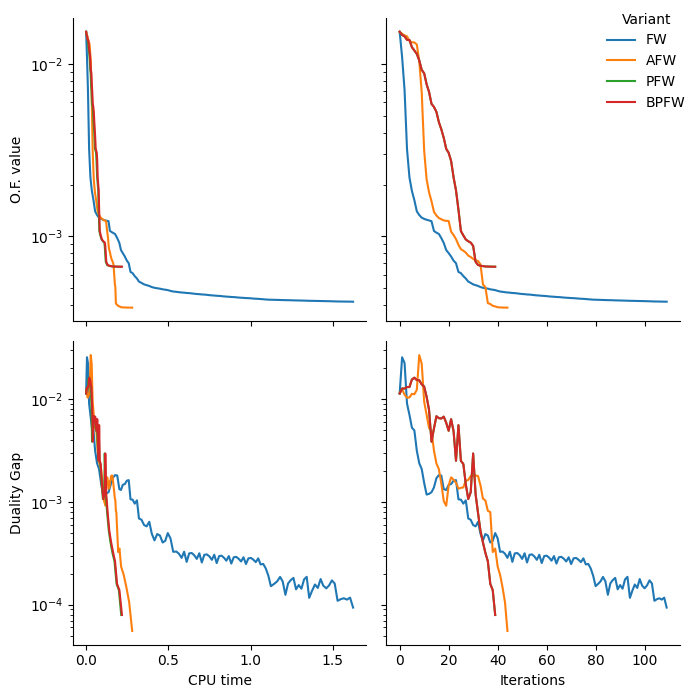

In [6]:
plot_hisotry(df, 8, size=7, title=False)

### Aggregated results over 50 runs

In [37]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'seed']).max().reset_index()
df_final[['Variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant']).agg(['max','mean', 'std'])

iteration                     cpu_time                     max_clique   
              max    mean        std       max      mean       std        max   
Variant                                                                         
AFW            48   43.16   2.526270  0.518569  0.330865  0.070365          6  \
BPFW           45   37.62   2.791313  0.368615  0.240796  0.053365          6   
FW            171  116.90  20.527980  3.359545  2.168549  0.522194          6   
PFW            45   37.82   2.730702  0.386210  0.246693  0.059674          6   

                         
         mean       std  
Variant                  
AFW      6.00  0.000000  
BPFW     5.98  0.141421  
FW       6.00  0.000000  
PFW      5.98  0.141421

### Plotting the results for some seed

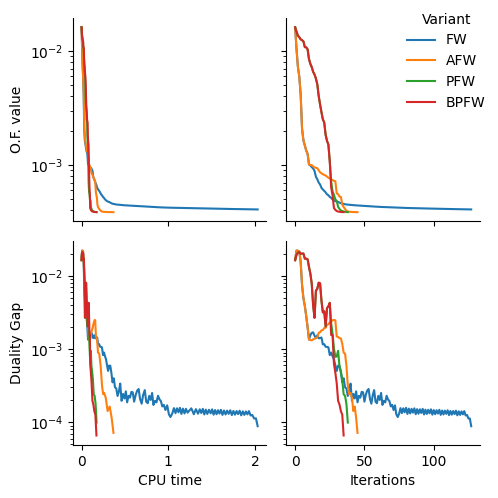

In [38]:
plot_hisotry(df, 48, size=5, title=False)

## Instance 2: Hamming6-2

In [39]:
dataset = "hamming6-2"
tolerance = 1e-5

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 630016, 5360)

In [8]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    for variant in variants:
        print(seed, variant)
        fw = FW(variant=variant, ssc_procedure=False, stepsize_strategy='armijo', tolerance=tolerance)
        fw.optimize(complement_hyperedges, n, seed=seed)

        # save the results into a dataframe
        df_current = pd.DataFrame(fw.history)
        df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))
        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0 FW
0 AFW
0 PFW
0 BPFW
global step
global step
1 FW
1 AFW
1 PFW
1 BPFW
2 FW
2 AFW
2 PFW
2 BPFW
global step
3 FW
3 AFW
3 PFW
3 BPFW
global step
4 FW
4 AFW
4 PFW
4 BPFW
5 FW
5 AFW
5 PFW
5 BPFW
global step
global step
6 FW
6 AFW
6 PFW
6 BPFW
7 FW
7 AFW
7 PFW
7 BPFW
8 FW
8 AFW
8 PFW
8 BPFW
global step
9 FW
9 AFW
9 PFW
9 BPFW
global step
global step
10 FW
10 AFW
10 PFW
10 BPFW
11 FW
11 AFW
11 PFW
11 BPFW
global step
12 FW
12 AFW
12 PFW
12 BPFW
13 FW
13 AFW
13 PFW
13 BPFW
global step
global step
14 FW
14 AFW
14 PFW
14 BPFW
global step
15 FW
15 AFW
15 PFW
15 BPFW
global step
16 FW
16 AFW
16 PFW
16 BPFW
17 FW
17 AFW
17 PFW
17 BPFW
global step
18 FW
18 AFW
18 PFW
18 BPFW
19 FW
19 AFW
19 PFW
19 BPFW
global step
global step
global step
20 FW
20 AFW
20 PFW
20 BPFW
global step
global step
21 FW
21 AFW
21 PFW
21 BPFW
22 FW
22 AFW
22 PFW
22 BPFW
23 FW
23 AFW
23 PFW
23 BPFW
global step
global step
24 FW
24 AFW
24 PFW
24 BPFW
25 FW
25 AFW
25 PFW
25 BPFW
global step
26 FW
26 AFW
26 PFW
26 BPFW
global s

### Aggregated resuts over 50 runs

In [41]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'seed']).max().reset_index()
df_final[['Variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant']).agg(['max','mean', 'std'])

iteration                     cpu_time                     max_clique   
              max    mean        std       max      mean       std        max   
Variant                                                                         
AFW           101   77.32  14.174481  0.700910  0.407435  0.117145         32  \
BPFW           75   61.12   5.524122  0.302994  0.207690  0.048082         32   
FW            166  131.64  16.964260  2.222798  1.459088  0.296660         32   
PFW            76   60.52   5.970130  0.312720  0.196887  0.044396         32   

                          
          mean       std  
Variant                   
AFW      26.84  2.359177  
BPFW     26.64  1.625812  
FW       25.90  1.798525  
PFW      26.58  1.604712

### Plotting the results for some seed

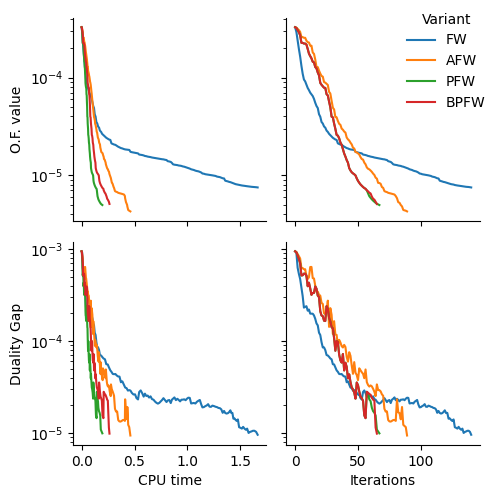

In [42]:
plot_hisotry(df, 9, title=False, size=5)

# SSC procedure with backtracking line search

In [43]:
stepsize_strategy = 'backtracking'

## Instance 1: Johnson8-2-4

In [44]:
dataset = "johnson8-2-4"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [13]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    print(seed)
    for variant in variants:
        for ssc in [True, False]:
            fw = FW(variant=variant, 
                    stepsize_strategy = stepsize_strategy, 
                    ssc_procedure=ssc,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))

            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0
1
2
3
4
5
6
global step
7
global step
8
9
global step
10
11
12
13
14
15
16
17
18
19
20
21
22
23
global step
24
25
26
27
28
29
30
31
32
33
global step
34
35
global step
36
37
38
39
global step
40
global step
41
42
global step
43
44
45
46
global step
47
48
global step
49


In [14]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                    cpu_time                       
                    max   mean        std       max      mean       std   
Variant SSC                                                               
AFW     False        87  56.56  11.719790  0.414210  0.231036  0.053992  \
        True         20  16.40   1.905952  0.280565  0.193782  0.041480   
BPFW    False        79  51.16  10.960709  0.367268  0.199770  0.059647   
        True         18  14.04   2.079639  0.274869  0.175413  0.039121   
PFW     False        79  51.18  10.981785  0.354887  0.201054  0.057524   
        True         18  14.12   2.096060  0.276559  0.180260  0.039663   

              max_clique                  
                     max  mean       std  
Variant SSC                               
AFW     False          6  5.98  0.141421  
        True           7  6.02  0.141421  
BPFW    False          6  5.98  0.141421  
        True           6  5.86  0.350510  
PFW     False          6  5.98  0.141421  
        True           6  5.86  0.350510

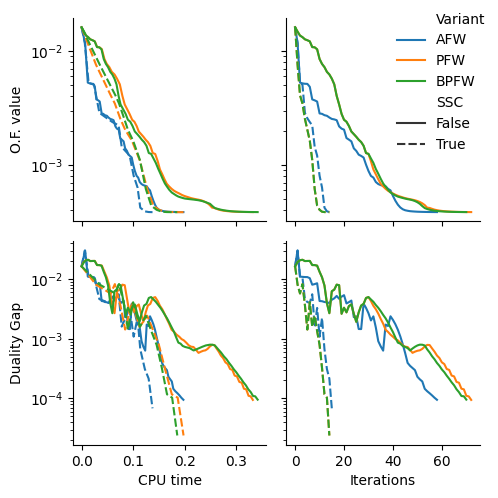

In [15]:
plot_hisotry(df, 48, True, title=False, size=5)

## Instance 2: Hamming6-2

In [45]:
dataset = "hamming6-2"
tolerance = 1e-5

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 630016, 5360)

In [17]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    print(seed)
    for variant in variants:
        for ssc in [True, False]:
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc,
                    linesearch_args={'L': 0.01},
                    tolerance=tolerance)
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))

            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0
global step
1
2
global step
global step
3
4
global step
5
global step
global step
6
7
8
global step
global step
9
global step
global step
10
11
global step
global step
12
global step
global step
13
global step
global step
14
global step
global step
15
global step
global step
global step
16
17
global step
global step
18
global step
global step
19
global step
global step
20
global step
global step
21
global step
22
global step
global step
23
global step
global step
global step
24
25
global step
global step
26
global step
global step
global step
27
global step
28
global step
global step
global step
global step
29
30
31
32
33
global step
global step
global step
34
global step
global step
global step
global step
35
36
global step
global step
global step
37
38
39
global step
40
41
global step
global step
global step
global step
global step
global step
42
global step
global step
global step
43
global step
44
global step
global step
global step
global step
global step
global step
global step

In [46]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir+'/runs.csv')
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                     cpu_time                       
                    max    mean        std       max      mean       std   
Variant SSC                                                                
AFW     False       348  173.22  54.301235  0.876111  0.436843  0.153320  \
        True        214  122.90  30.823560  0.858865  0.484793  0.130026   
BPFW    False       228  123.80  29.702608  0.520987  0.315879  0.087112   
        True        163   89.64  26.752654  0.610490  0.380432  0.102519   
PFW     False       182  113.18  21.546049  0.469722  0.289716  0.072815   
        True        119   80.92  18.631595  0.591232  0.356389  0.084906   

              max_clique                   
                     max   mean       std  
Variant SSC                                
AFW     False         32  25.64  2.164274  
        True          32  26.10  2.314550  
BPFW    False         32  26.56  1.786114  
        True          32  26.64  1.859998  
PFW     False         32  26.62  1.817040  
        True          32  26.78  2.023232

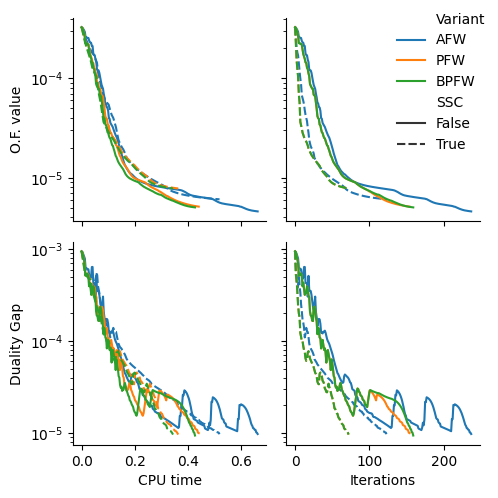

In [19]:
plot_hisotry(df, seed=9, ssc=True, title=False, size=5)

## Instance 3: Hamming6-4

In [47]:
dataset = "hamming6-4"
tolerance = 1e-4

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 61776, 573600)

In [21]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(10):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc, 
                    tolerance=tolerance,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])
            
dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0 AFW True
0 AFW False
0 PFW True
0 PFW False
0 BPFW True
global step
global step
0 BPFW False
global step
1 AFW True
1 AFW False
1 PFW True
1 PFW False
1 BPFW True
global step
1 BPFW False
2 AFW True
2 AFW False
2 PFW True
2 PFW False
2 BPFW True
2 BPFW False
global step
3 AFW True
3 AFW False
3 PFW True
3 PFW False
3 BPFW True
global step
3 BPFW False
4 AFW True
4 AFW False
4 PFW True
4 PFW False
4 BPFW True
global step
4 BPFW False
5 AFW True
5 AFW False
5 PFW True
5 PFW False
5 BPFW True
5 BPFW False
6 AFW True
6 AFW False
6 PFW True
6 PFW False
6 BPFW True
6 BPFW False
global step
7 AFW True
7 AFW False
7 PFW True
7 PFW False
7 BPFW True
global step
7 BPFW False
8 AFW True
8 AFW False
8 PFW True
8 PFW False
8 BPFW True
8 BPFW False
9 AFW True
9 AFW False
9 PFW True
9 PFW False
9 BPFW True
global step
9 BPFW False


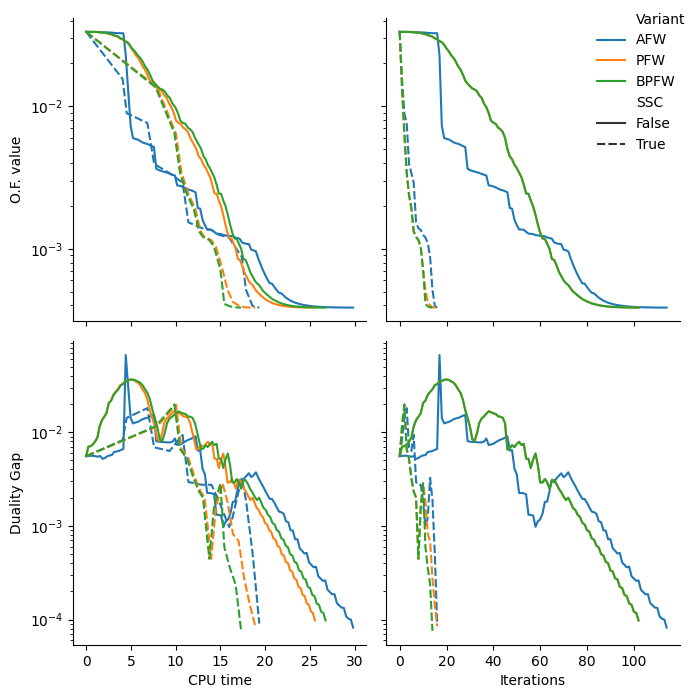

In [113]:
plot_hisotry(df, seed=1, ssc=True, title=False, size=7)

In [48]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                     cpu_time                        
                    max   mean        std        max       mean       std   
Variant SSC                                                                 
AFW     False       144   97.9  18.320905  36.522425  25.284556  4.569684  \
        True         25   20.4   2.716207  22.998152  20.741485  1.334794   
BPFW    False       109   99.9   6.919377  28.511171  25.629312  1.972129   
        True         17   15.0   1.154701  19.920756  18.516007  0.886077   
PFW     False       109  100.1   7.171704  29.254982  25.670150  2.360443   
        True         18   15.4   1.577621  20.339801  18.833022  1.343402   

              max_clique            
                     max mean  std  
Variant SSC                         
AFW     False          6  6.0  0.0  
        True           6  6.0  0.0  
BPFW    False          6  6.0  0.0  
        True           6  6.0  0.0  
PFW     False          6  6.0  0.0  
        True           6  6.0  0.0

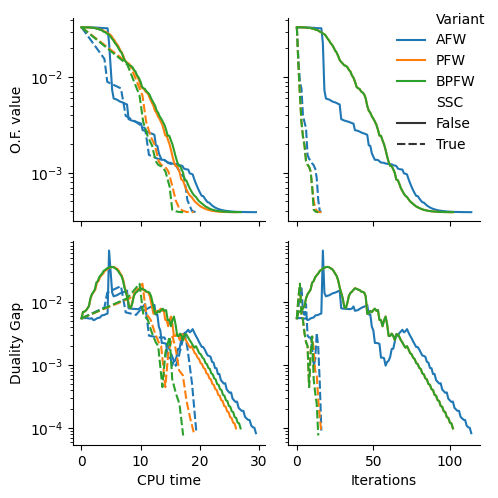

In [49]:
plot_hisotry(df, seed=1, ssc=True, title=False, size=5)

## Instance 4: Johnson8-4-4

In [50]:
dataset = "johnson8-4-4"
tolerance = 1e-4

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(70, 800275, 116620)

In [25]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(10):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc, 
                    tolerance=tolerance,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])
            
dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0 AFW True
0 AFW False
0 PFW True
0 PFW False
0 BPFW True
0 BPFW False
1 AFW True
1 AFW False
1 PFW True
1 PFW False
1 BPFW True
1 BPFW False
2 AFW True
2 AFW False
2 PFW True
2 PFW False
2 BPFW True
global step
2 BPFW False
3 AFW True
3 AFW False
3 PFW True
3 PFW False
3 BPFW True
3 BPFW False
4 AFW True
4 AFW False
4 PFW True
4 PFW False
4 BPFW True
global step
4 BPFW False
5 AFW True
5 AFW False
5 PFW True
5 PFW False
5 BPFW True
5 BPFW False
global step
6 AFW True
6 AFW False
6 PFW True
6 PFW False
6 BPFW True
6 BPFW False
7 AFW True
7 AFW False
7 PFW True
7 PFW False
7 BPFW True
7 BPFW False
8 AFW True
8 AFW False
8 PFW True
8 PFW False
8 BPFW True
8 BPFW False
9 AFW True
9 AFW False
9 PFW True
9 PFW False
9 BPFW True
9 BPFW False


In [26]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                      cpu_time                        
                    max   mean         std        max       mean       std   
Variant SSC                                                                  
AFW     False       649  220.0  157.578904  36.124455  11.463588  8.994175  \
        True         49   43.9    4.175324   6.009311   5.146911  0.690045   
BPFW    False       132  100.7   15.004074   7.242813   5.143458  1.076391   
        True         33   28.2    3.011091   5.336868   4.188424  0.627550   
PFW     False       143  104.8   18.213548   7.882844   5.303316  1.250432   
        True         32   27.6    3.098387   5.172352   4.120840  0.589960   

              max_clique                  
                     max  mean       std  
Variant SSC                               
AFW     False         16  15.0  1.154701  
        True          16  14.9  1.100505  
BPFW    False         17  14.4  1.349897  
        True          15  14.0  0.666667  
PFW     False         16  14.3  0.948683  
        True          15  14.2  0.632456

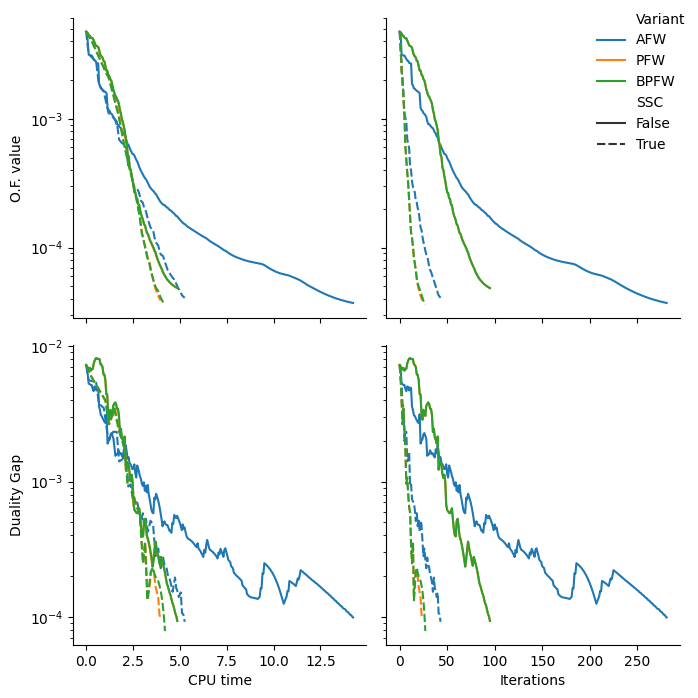

In [27]:
plot_hisotry(df, seed=2, ssc=True, title=False, size=7)

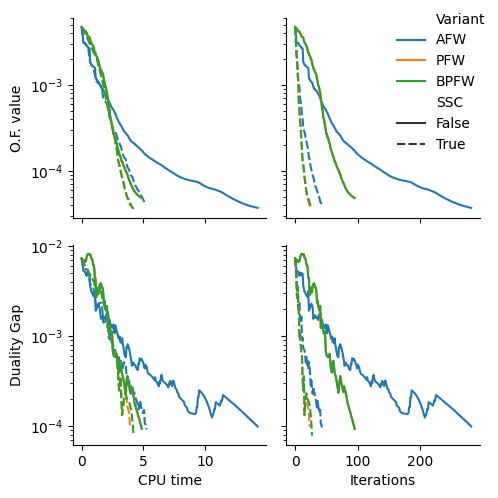

In [28]:
plot_hisotry(df, seed=2, ssc=True, title=False, size=5)

# Collecting all results

In [29]:
lss = ['armijo', 'backtracking']
datasets = ['johnson8-2-4', 'hamming6-2', 'hamming6-4', 'johnson8-4-4']
df = pd.DataFrame()
for ls in lss:
    for dataset in datasets:
        if (dataset == 'hamming6-4' or dataset == 'johnson8-4-4') and ls == 'armijo':
            pass
        else:
            df1 = pd.read_csv(f'results/{ls}/{dataset}/runs.csv')
            if ls == 'armijo':
                df1['SSC'] = pd.Series([False] * len(df1))
            df1['line_search'] = pd.Series([ls] * len(df1))
            df1['Instance'] = pd.Series([dataset] * len(df1))
            df = pd.concat([df, df1])


In [30]:
df_arm = df[df.line_search == 'armijo']
df_arm = df_arm[['Instance', 'Variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Instance', 'Variant', 'seed']).max().reset_index()
results_arm = df_arm[['Instance', 'Variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['Instance', 'Variant']).agg(['max','mean', 'std'])
results_arm.round(3)

iteration                 cpu_time                 
                           max    mean     std      max   mean    std   
Instance     Variant                                                    
hamming6-2   AFW           101   77.32  14.174    0.701  0.407  0.117  \
             BPFW           75   61.12   5.524    0.303  0.208  0.048   
             FW            166  131.64  16.964    2.223  1.459  0.297   
             PFW            76   60.52   5.970    0.313  0.197  0.044   
johnson8-2-4 AFW            48   43.16   2.526    0.519  0.331  0.070   
             BPFW           45   37.62   2.791    0.369  0.241  0.053   
             FW            171  116.90  20.528    3.360  2.169  0.522   
             PFW            45   37.82   2.731    0.386  0.247  0.060   

                     max_clique                
                            max   mean    std  
Instance     Variant                           
hamming6-2   AFW             32  26.84  2.359  
             BPFW            32  26.64  1.626  
             FW              32  25.90  1.799  
             PFW             32  26.58  1.605  
johnson8-2-4 AFW              6   6.00  0.000  
             BPFW             6   5.98  0.141  
             FW               6   6.00  0.000  
             PFW              6   5.98  0.141

In [31]:
print(results_arm.to_latex(float_format="%.3f"))

\begin{tabular}{llrrrrrrrrr}
\toprule
 &  & \multicolumn{3}{r}{iteration} & \multicolumn{3}{r}{cpu_time} & \multicolumn{3}{r}{max_clique} \\
 &  & max & mean & std & max & mean & std & max & mean & std \\
Instance & Variant &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{hamming6-2} & AFW & 101 & 77.320 & 14.174 & 0.701 & 0.407 & 0.117 & 32 & 26.840 & 2.359 \\
 & BPFW & 75 & 61.120 & 5.524 & 0.303 & 0.208 & 0.048 & 32 & 26.640 & 1.626 \\
 & FW & 166 & 131.640 & 16.964 & 2.223 & 1.459 & 0.297 & 32 & 25.900 & 1.799 \\
 & PFW & 76 & 60.520 & 5.970 & 0.313 & 0.197 & 0.044 & 32 & 26.580 & 1.605 \\
\cline{1-11}
\multirow[t]{4}{*}{johnson8-2-4} & AFW & 48 & 43.160 & 2.526 & 0.519 & 0.331 & 0.070 & 6 & 6.000 & 0.000 \\
 & BPFW & 45 & 37.620 & 2.791 & 0.369 & 0.241 & 0.053 & 6 & 5.980 & 0.141 \\
 & FW & 171 & 116.900 & 20.528 & 3.360 & 2.169 & 0.522 & 6 & 6.000 & 0.000 \\
 & PFW & 45 & 37.820 & 2.731 & 0.386 & 0.247 & 0.060 & 6 & 5.980 & 0.141 \\
\cline{1-11}
\bottomrule
\end{tabular}

In [32]:
df_bt = df[df.line_search == 'backtracking']
df_bt = df_bt[['Instance', 'Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Instance', 'Variant', 'SSC', 'seed']).max().reset_index()
results_bt = df_bt[['Instance', 'Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Instance', 'Variant', 'SSC']).agg(['max','mean', 'std'])
results_bt.round(3)

iteration                  cpu_time                  
                                 max    mean      std      max    mean    std   
Instance     Variant SSC                                                        
hamming6-2   AFW     False       348  173.22   54.301    0.876   0.437  0.153  \
                     True        214  122.90   30.824    0.859   0.485  0.130   
             BPFW    False       228  123.80   29.703    0.521   0.316  0.087   
                     True        163   89.64   26.753    0.610   0.380  0.103   
             PFW     False       182  113.18   21.546    0.470   0.290  0.073   
                     True        119   80.92   18.632    0.591   0.356  0.085   
hamming6-4   AFW     False       144   97.90   18.321   36.522  25.285  4.570   
                     True         25   20.40    2.716   22.998  20.741  1.335   
             BPFW    False       109   99.90    6.919   28.511  25.629  1.972   
                     True         17   15.00    1.155   19.921  18.516  0.886   
             PFW     False       109  100.10    7.172   29.255  25.670  2.360   
                     True         18   15.40    1.578   20.340  18.833  1.343   
johnson8-2-4 AFW     False        87   56.56   11.720    0.414   0.231  0.054   
                     True         20   16.40    1.906    0.281   0.194  0.041   
             BPFW    False        79   51.16   10.961    0.367   0.200  0.060   
                     True         18   14.04    2.080    0.275   0.175  0.039   
             PFW     False        79   51.18   10.982    0.355   0.201  0.058   
                     True         18   14.12    2.096    0.277   0.180  0.040   
johnson8-4-4 AFW     False       649  220.00  157.579   36.124  11.464  8.994   
                     True         49   43.90    4.175    6.009   5.147  0.690   
             BPFW    False       132  100.70   15.004    7.243   5.143  1.076   
                     True         33   28.20    3.011    5.337   4.188  0.628   
             PFW     False       143  104.80   18.214    7.883   5.303  1.250   
                     True         32   27.60    3.098    5.172   4.121  0.590   

                           max_clique                
                                  max   mean    std  
Instance     Variant SSC                             
hamming6-2   AFW     False         32  25.64  2.164  
                     True          32  26.10  2.315  
             BPFW    False         32  26.56  1.786  
                     True          32  26.64  1.860  
             PFW     False         32  26.62  1.817  
                     True          32  26.78  2.023  
hamming6-4   AFW     False          6   6.00  0.000  
                     True           6   6.00  0.000  
             BPFW    False          6   6.00  0.000  
                     True           6   6.00  0.000  
             PFW     False          6   6.00  0.000  
                     True           6   6.00  0.000  
johnson8-2-4 AFW     False          6   5.98  0.141  
                     True           7   6.02  0.141  
             BPFW    False          6   5.98  0.141  
                     True           6   5.86  0.351  
             PFW     False          6   5.98  0.141  
                     True           6   5.86  0.351  
johnson8-4-4 AFW     False         16  15.00  1.155  
                     True          16  14.90  1.101  
             BPFW    False         17  14.40  1.350  
                     True          15  14.00  0.667  
             PFW     False         16  14.30  0.949  
                     True          15  14.20  0.632

In [34]:
print(results_bt.to_latex(float_format="%.3f"))

\begin{tabular}{lllrrrrrrrrr}
\toprule
 &  &  & \multicolumn{3}{r}{iteration} & \multicolumn{3}{r}{cpu_time} & \multicolumn{3}{r}{max_clique} \\
 &  &  & max & mean & std & max & mean & std & max & mean & std \\
Instance & Variant & SSC &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{hamming6-2} & \multirow[t]{2}{*}{AFW} & False & 348 & 173.220 & 54.301 & 0.876 & 0.437 & 0.153 & 32 & 25.640 & 2.164 \\
 &  & True & 214 & 122.900 & 30.824 & 0.859 & 0.485 & 0.130 & 32 & 26.100 & 2.315 \\
\cline{2-12}
 & \multirow[t]{2}{*}{BPFW} & False & 228 & 123.800 & 29.703 & 0.521 & 0.316 & 0.087 & 32 & 26.560 & 1.786 \\
 &  & True & 163 & 89.640 & 26.753 & 0.610 & 0.380 & 0.103 & 32 & 26.640 & 1.860 \\
\cline{2-12}
 & \multirow[t]{2}{*}{PFW} & False & 182 & 113.180 & 21.546 & 0.470 & 0.290 & 0.073 & 32 & 26.620 & 1.817 \\
 &  & True & 119 & 80.920 & 18.632 & 0.591 & 0.356 & 0.085 & 32 & 26.780 & 2.023 \\
\cline{1-12} \cline{2-12}
\multirow[t]{6}{*}{hamming6-4} & \multirow[t]{2}{*}{AFW} & Fa